<a href="https://colab.research.google.com/github/WLAraujo/sist_inteli_ufabc/blob/main/Projeto_SI_2022_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto: Sistemas Inteligentes
Prof. Dr. Luneque Del Rio de Souza e Silva Junior

# Comparação de Modelos e Otimização de Hiperparâmetros em um Problema de Classificação

Nesse projeto compararemos classificadores diferentes para um problema de classificação baseado no seguinte dataset disponibilizado no Kaggle: https://www.kaggle.com/datasets/imohtn/video-games-rating-by-esrb?select=test_esrb.csv. Além disso, antes de comparar diferentes desempenhos de algoritmos de Machine Learning para classificação vamos realizar buscas para otimizar os hiperparâmetros desses algoritmos quando aplicados nos dados do problema.

Esse dataset traz dois arquivos .csv, um com 1895 amostras e outro com 494 amostras. Os dois arquivos possuem a mesma estrutura, o que diferencia ambos é que quem os disponibilizou já separou os arquivos em treino e teste. Como desejamos fazer um projeto exploratório vamos unir esses dois arquivos.

O problema de classificação que trabalharemos é o seguinte, temos uma extensa lista de jogos e de conteúdos presentes neles representados através de features binárias (1 para presente e 0 para não presente). Cada coluna trata de um conteúdo, exemplo "Conteúdo Sexual = 0". O que desejamos é construir um classificador que dê a classificação parental de um jogo com base nos conteúdos presentes nele.

A classificação parental é o nosso target. Ela possui quatro classes, E (Everyone), ET (Everyone plus 10), T (Teen) e M (Mature).

Sobre os experimentos em si, vamos realizar uma exploração com diferentes classificadores: KNN e Decision-Tree

Para cada um desses algoritmos de classificação também faremos uma exploração para otimização dos hiperparâmetros. Para o KNN construiremos classificadores que variam de 1 a 15 vizinhos, o hiperparâmetro principal desse algoritmo. Além de também testarmos diferentes métricas de distância euclidiana e de manhattan.
Para a árvore de decisão construiremos árvores com critérios de gini e entropia que vão apresentar as seguintes variações nos hiperparâmetros:

* Profundidade máxima da árvore, entre 1 e 20
* Número mínimo de amostras por folha, entre 1 e 30
* Número mínimo de amostras para realizar split, entre 1 e 30 

Para divisão de dataset em teste e treino usaremos k-fold, onde:
1. Juntaremos os dois datasets fornecidos
2. Embaralharemos o dataset resultado
3. Faremos a divisão do dataset em k-folds
4. Usaremos cada divisão de fold como test e treino
5. Usaremos na comparação de desempenho o modelo com melhor desempenho

Como principal métrica de avaliação usaremos a acurácia dos modelos treinados.Veja que o projeto consiste numa iteração de treinamento realmente intesa, por isso construiremos funções pipeline que automatizem muitos desses processos.

Nossos objetivos de maneira direta são:
* Buscar os otimizar os hiperparâmetros citados de cada algoritmo através de comparação da acurácia de diferentes modelos com hiperparâmetros diferentes, isso usando o K-Folds
* Concluir qual seria o melhor modelo, dentre os treinados ao longo do trabalho, para resolver o problema de classificação etária de jogos proposto.





# 1 - Importando os Dados

Vamos importar os dados de um repositório do Github de um dos membros do grupo usando o comando wget.

In [ ]:
!wget https://raw.githubusercontent.com/WLAraujo/sist_inteli_ufabc/main/projeto_final/esrb_rating_1.csv
!wget https://raw.githubusercontent.com/WLAraujo/sist_inteli_ufabc/main/projeto_final/esrb_rating_2.csv

--2022-05-07 20:46:04--  https://raw.githubusercontent.com/WLAraujo/sist_inteli_ufabc/main/projeto_final/esrb_rating_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168895 (165K) [text/plain]
Saving to: ‘esrb_rating_1.csv’

esrb_rating_1.csv   100%[===================>] 164.94K  --.-KB/s    in 0.03s   

2022-05-07 20:46:05 (5.92 MB/s) - ‘esrb_rating_1.csv’ saved [168895/168895]

--2022-05-07 20:46:05--  https://raw.githubusercontent.com/WLAraujo/sist_inteli_ufabc/main/projeto_final/esrb_rating_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting resp

# 2 - Criando e unificando os dataframes

Com base nos dois arquivos .csv que importamos vamos criar dois dataframes do pandas e depois vamos uni-los conforme já comentamos. Lembrando que isso só é possível porque ambos os datasets possuem a mesma estrutura.

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:
#Criando os dois dataframes e unificando eles
dados_1 = pd.read_csv("esrb_rating_1.csv")
dados_2 = pd.read_csv("esrb_rating_2.csv")
dados = pd.concat([dados_1, dados_2])
dados.reset_index(drop=True, inplace=True)

In [ ]:
# Visualizando o novo dataframe
dados.head(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


Para verificar se está tudo certo vamos ver as dimensões dos dois dataframes originais e do novo dataframe.

In [ ]:
# Visualizando dimensões
print(f'dados_1: {dados_1.shape} \ndados_2: {dados_2.shape} \ndados: {dados.shape}')

dados_1: (1895, 34) 
dados_2: (500, 34) 
dados: (2395, 34)


# 3 - Visualizando a distribuição de classificações

Vamos visualizar o cruzamento entre as classificações, nosso target, e as outras colunas de classificação.

In [ ]:
# Quantidade de jogos com cada classificação
dados["esrb_rating"].value_counts()

T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64

In [ ]:
# Quantidade de jogos com determinado conteúdo em cada classificação
dados.groupby(["esrb_rating"])[dados.columns[1:34]].sum()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
esrb_rating,,,,,,,,,,,,,,,,,,,,,
E,265,18,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,1,1
ET,213,54,10,0,0,27,35,12,350,45,...,1,0,0,4,1,4,33,12,12,4
M,273,1,0,195,241,0,7,30,50,124,...,33,43,79,63,241,85,68,12,7,59
T,397,48,10,359,64,21,78,40,151,93,...,20,32,35,71,8,4,160,49,35,211


# 4 - Definindo classificadores que serão usados

Como apontamos na nossa descrição de metodologia usaremos dois algoritmos de classificação mas com grande diversidade de parâmetros. Para facilitar etapas posteriores vamos definir os classificadores que serão usados em um dicionário.

In [ ]:
# Importando as classes de algoritmos de machine learning do scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Dicionário de modelos com explicação de cada modelo
dic_modelos = {
    "knn_manhattan" : KNeighborsClassifier(p=1),
    "knn_euclideano" : KNeighborsClassifier(p=2),
    "knn_chebyshev" : KNeighborsClassifier(metric='chebyshev'),
    "arv_gini" : DecisionTreeClassifier(criterion="gini"),
    "arv_entrop" : DecisionTreeClassifier(criterion="entropy")
}
# Outras variações como profundidade e número de vizinhos serão definidos mais adiante

# 5 - Divisão feature e target

Vamos dividir nossos dados em dataframes com as features e os targets. Além disso, também vamos remover a coluna que contém o nome dos jogos pois ela não é relevantes para a classificação.

In [ ]:
# Definindo novos dataframes de features e target
features = dados.iloc[:, 1:33].copy()
target = dados["esrb_rating"].copy()

In [ ]:
features.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
target.head()

0     E
1    ET
2     M
3    ET
4     T
Name: esrb_rating, dtype: object

# 6 - Pipeline de treino e avaliação

Para automatizar uma parte considerável do nosso trabalho, vamos criar uma função de pipeline que seja capaz de treinar nossos modelos usando k-folds e nos devolver o modelo com maior acurácia.

Dentro do pipeline os processos executados serão:

1. Realizar um KFold com 5 partes (20%) do dataset. Antes de realizar a divisão os dados serão embaralhados aleatoriamente com uma *seed* bem definida para reprodutibilidade do experimento.
2. Para cada fold faremos um treinamento considerado aquele fold como a parte de teste do modelo.
3. Vamos acumular em uma lista os valores de acurácia alcançados com o modelo treinado com aqueles dados de teste e treino.
4. Vamos devolver a lista com os valores de acurácia, a matriz de confusão e os índices de treino e teste que resultaram no modelo de maior acurácia.

Veja que existe um tratamento especial caso o modelo passado seja instância da classe GridSearchCV, mais explicações sobre o uso dessa classe e sua importância serão dados na parte 12 desse notebook. Até lá considere que caso o modelo seja de Árvore de Decisão ele entrará nesse `if` e caso seja KNN entrará no `else`.



In [ ]:
# Realizando importações necessárias
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import numpy

In [ ]:
# Criando pipeline de treino e avaliação dos modelos
def pipeline_treino_teste(feat, target, modelo):
  acur_melhor_modelo = 0
  acuracias = []
  fold_div = KFold(n_splits=5, shuffle=True, random_state=123)
  folds = fold_div.split(dados)
  if isinstance(modelo, GridSearchCV):
    modelo.cv = fold_div
    modelo.fit(feat, target)
    return modelo
  else:
    for treino_index, teste_index in folds:
      feat_treino, feat_teste = feat.iloc[treino_index], feat.iloc[teste_index]
      target_treino, target_teste = target.iloc[treino_index], target.iloc[teste_index]
      modelo.fit(feat_treino, target_treino)
      predict_teste = modelo.predict(feat_teste)
      acur = accuracy_score(target_teste, predict_teste)
      cf_matrix = confusion_matrix(target_teste, predict_teste, labels=list(target_teste.unique()))
      acuracias.append(acur)
      if acur > acur_melhor_modelo:
        acur_melhor_modelo = acur
        melhor_modelo = modelo
        melhor_treino = treino_index
        melhor_teste = teste_index
        melhor_matriz = cf_matrix
    return acuracias, melhor_modelo, melhor_treino, melhor_teste, melhor_matriz

# 7 - Pipeline para KNN

Outro pipeline que vamos criar para automatizar mais uma parte do trabalho é o de KNN. Nesse pipeline vamos realizar a iteração de número de vizinhos para o modelo passado. A criação desse pipeline é possível devido a já termos definido qual o range de vizinhos que queremos, de 1 a 15. 

Essa função desse pipeline vai devolver todas as informações que o `pipeline_treino_teste` devolve, porém, vai devolver como vários dicionários para cada tipo de elemento onde a chave do dicionário é a quantidade de vizinhos. Isso facilitará análises futuras, pois unirá em um a única estrutura todos os resultados.

In [ ]:
def pipeline_knn(features, target, modelo):
  dic_acuracias = {}
  dic_modelo = {}
  dic_dados_treino = {}
  dic_dados_teste = {}
  dic_dados_matriz = {}
  for vizinhos in range(1,16):
    modelo.n_neighbors = vizinhos
    acuracias, melhor_modelo, melhor_treino, melhor_teste, melhor_matriz = pipeline_treino_teste(features, target, modelo)
    dic_acuracias[vizinhos] = acuracias
    dic_modelo[vizinhos] = melhor_modelo
    dic_dados_treino[vizinhos] = melhor_treino
    dic_dados_teste[vizinhos] = melhor_teste
    dic_dados_matriz[vizinhos] = melhor_matriz
  return dic_acuracias, dic_modelo, dic_dados_treino, dic_dados_teste, dic_dados_matriz

# 8 - KNN com distância de manhattan

Feitos os dois pipelines que usaremos para os testes de KNN vamos rodar os testes para o KNN usando distância manhattan e verificar alguns dos resultados.

In [ ]:
# Usando pipeline de KNN que já chama pipeline de treino e avaliação
dic_acuracias, dic_modelo, dic_dados_treino, dic_dados_teste, dic_dados_matriz = pipeline_knn(features, target, dic_modelos["knn_manhattan"])

Executados os pipelines vamos analisar os resultados. Vamos começar pelas acurácias. Para facilitar a visualização vamos criar um dataframe com base no dicionário.

In [ ]:
# Printando dataframe
print(pd.DataFrame(dic_acuracias))

         1         2         3         4         5         6         7   \
0  0.724426  0.774530  0.789144  0.780793  0.814196  0.799582  0.816284   
1  0.709812  0.766180  0.816284  0.837161  0.824635  0.835073  0.828810   
2  0.720251  0.805846  0.810021  0.818372  0.841336  0.830898  0.828810   
3  0.755741  0.774530  0.803758  0.822547  0.812109  0.797495  0.814196   
4  0.734864  0.795407  0.791232  0.820459  0.812109  0.812109  0.810021   

         8         9         10        11        12        13        14  \
0  0.812109  0.805846  0.803758  0.805846  0.801670  0.795407  0.789144   
1  0.824635  0.818372  0.814196  0.807933  0.807933  0.807933  0.805846   
2  0.828810  0.824635  0.824635  0.822547  0.820459  0.810021  0.816284   
3  0.807933  0.810021  0.810021  0.803758  0.805846  0.805846  0.807933   
4  0.810021  0.803758  0.812109  0.810021  0.810021  0.799582  0.805846   

         15  
0  0.784969  
1  0.803758  
2  0.812109  
3  0.810021  
4  0.801670  


Outra forma de facilitar a visualização é usar um gráfico para mostrar as médias de acurácia para cada número de vizinhos.

In [ ]:
# Importando seaborn e função de médias
import seaborn as sns
from statistics import mean

[Text(0, 0.5, 'Acurácia'), Text(0.5, 0, 'Número de vizinhos')]

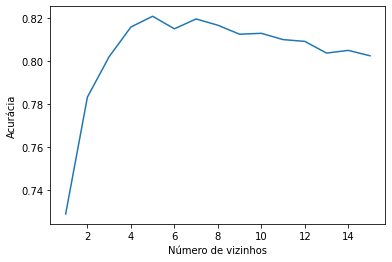

In [ ]:
# Plot das médias de acurácia
p = sns.lineplot(x=list(dic_acuracias.keys()), y=[mean(lista) for lista in list(dic_acuracias.values())])
p.set(xlabel = "Número de vizinhos", ylabel = "Acurácia")

Podemos observar que em relação ao número de vizinhos a acurácia média dos modelos começa muito baixa e cresce até atingir um pico com 5 vizinhos e depois começa uma queda estável.

Agora que realizamos uma análise das acurácias vamos ver como as matrizes de confusão se comportaram com as variações do número de vizinhos.

In [ ]:
# Importando método para display de matriz de confusão
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

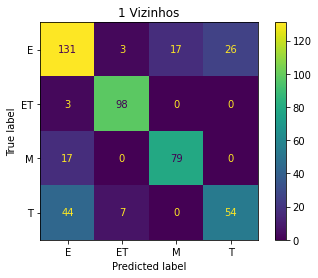

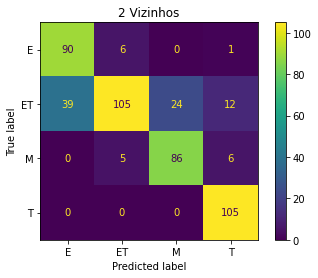

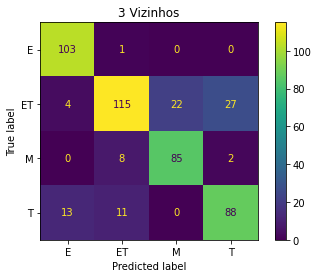

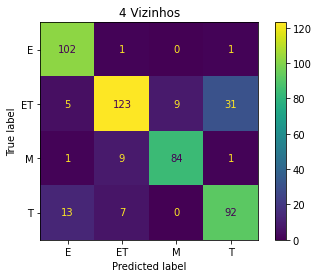

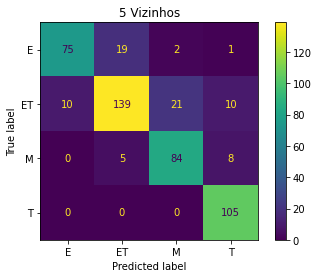

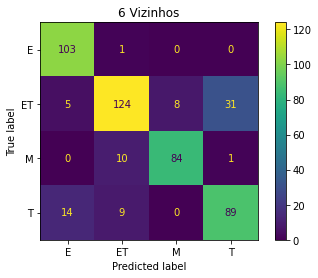

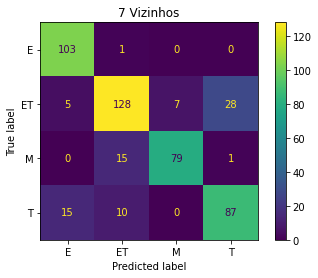

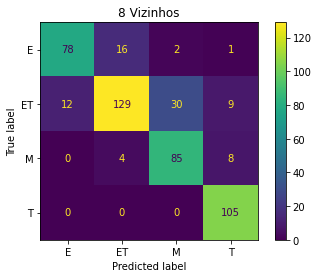

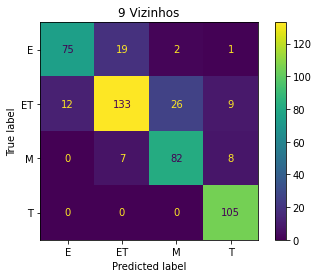

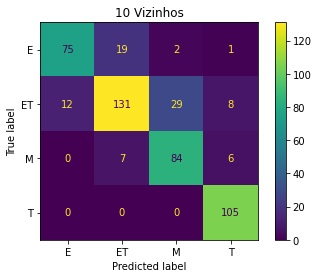

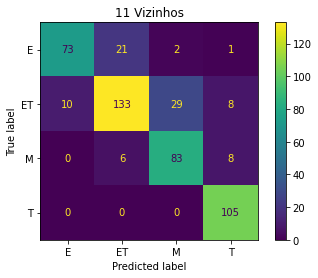

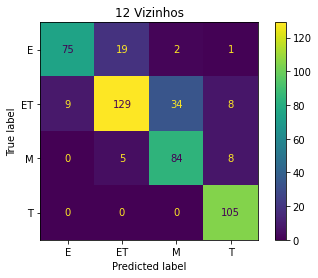

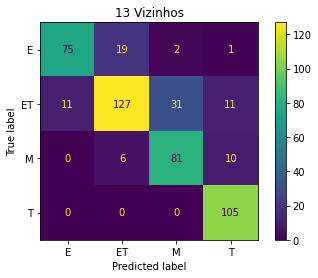

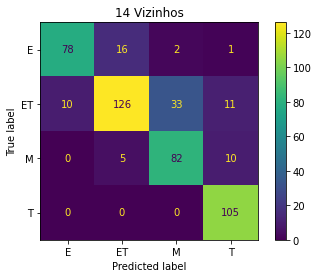

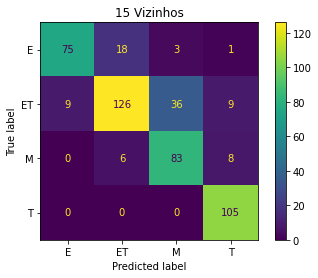

In [ ]:
# Mostrando todas as matrizes de confusão do modelo com melhor acurácia para cada n
for vizinhos in range(1,16):
  cmd = ConfusionMatrixDisplay(dic_dados_matriz[vizinhos], display_labels = list(target.unique())).plot()
  cmd.ax_.set_title(f"{vizinhos} Vizinhos")
  vizinhos = vizinhos + 1 
plt.show()

# 9 - KNN com distância euclidiana

Após treino de modelos KNN com distância Manhattan, vamos fazer o mesmo para distância Euclidiana. Para isso, vamos executar a pipeline KNN criada anteriormente, porém passando como parâmetro o modelo KNN com distância euclidiana.

In [ ]:
# Usando pipeline de KNN que já chama pipeline de treino e avaliação, porém passando o modelo com distancia euclidiana
dic_acuracias_dis_euc, dic_modelo_dis_euc, dic_dados_treino_dis_euc, dic_dados_teste_dis_euc, dic_dados_matriz_dis_euc = pipeline_knn(features, target, dic_modelos["knn_euclideano"])

Após execução das duas pipelines (treino e avaliação), vamos analisar os resultados. Novamente, vamos analisar as acuracias criando um dataframe com base no dicionário de retorno.

In [ ]:
# Printando dataframe
print(pd.DataFrame(dic_acuracias_dis_euc))

         1         2         3         4         5         6         7   \
0  0.724426  0.774530  0.789144  0.780793  0.814196  0.799582  0.816284   
1  0.709812  0.766180  0.816284  0.837161  0.824635  0.835073  0.828810   
2  0.720251  0.805846  0.810021  0.818372  0.841336  0.830898  0.828810   
3  0.755741  0.774530  0.803758  0.822547  0.812109  0.797495  0.814196   
4  0.734864  0.795407  0.791232  0.820459  0.812109  0.812109  0.810021   

         8         9         10        11        12        13        14  \
0  0.812109  0.805846  0.803758  0.805846  0.801670  0.795407  0.789144   
1  0.824635  0.818372  0.814196  0.807933  0.807933  0.807933  0.805846   
2  0.828810  0.824635  0.824635  0.822547  0.820459  0.810021  0.816284   
3  0.807933  0.810021  0.810021  0.803758  0.805846  0.805846  0.807933   
4  0.810021  0.803758  0.812109  0.810021  0.810021  0.799582  0.805846   

         15  
0  0.784969  
1  0.803758  
2  0.812109  
3  0.810021  
4  0.801670  


Podemos identificar que mesmo utilizando o KNN com cálculo de distância euclidiana, o resultado que obtivemos para as acurácias é exatamente o mesmo. Para facilitar a visualização, veja abaixo o gráfico de acurácia por número de vizinhos dos KNN utilizando distância euclidiana.

[Text(0, 0.5, 'Acurácia'),
 Text(0.5, 0, 'Número de vizinhos'),
 Text(0.5, 1.0, 'Acurácia x N° de vizinhos para KNN com distância Euclidiana')]

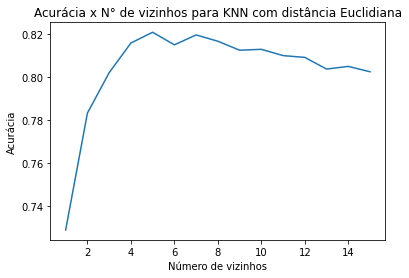

In [ ]:
# Plot das médias de acurácia 

p_dis_euc = sns.lineplot(x=list(dic_acuracias_dis_euc.keys()), y=[mean(lista) for lista in list(dic_acuracias_dis_euc.values())])
p_dis_euc.set(xlabel = "Número de vizinhos", ylabel = "Acurácia", title='Acurácia x N° de vizinhos para KNN com distância Euclidiana')


A mesma observação feita para o KNN com distancia de Manhattan pode ser feita para o KNN com distância euclidiana com relação ao número de vizinhos. A acurácia média dos modelos começa muito baixa e cresce até atingir um pico com 5 vizinhos e depois começa uma queda estável.

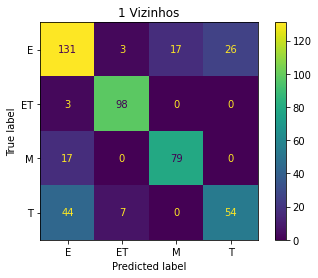

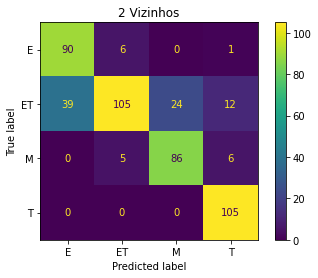

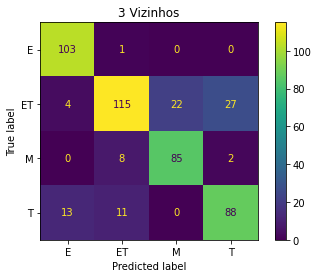

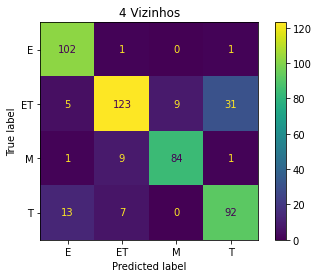

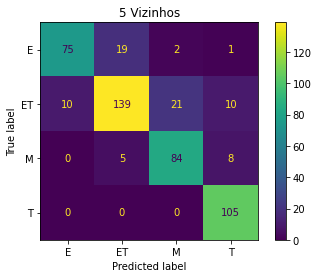

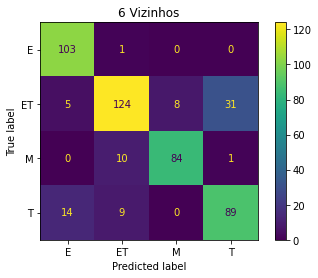

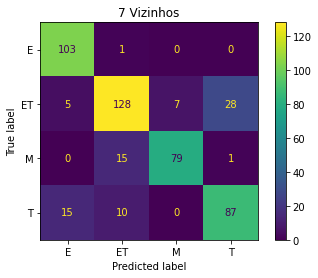

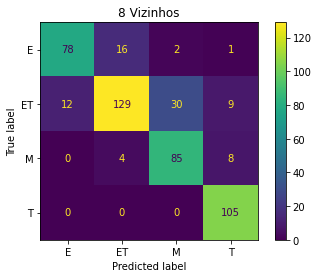

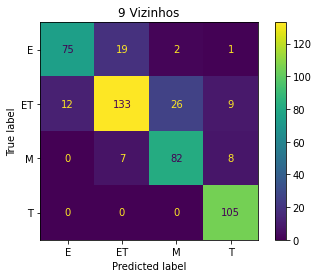

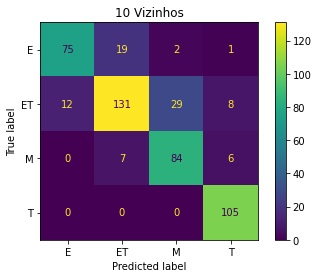

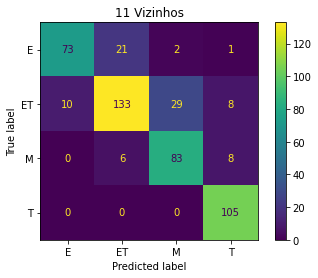

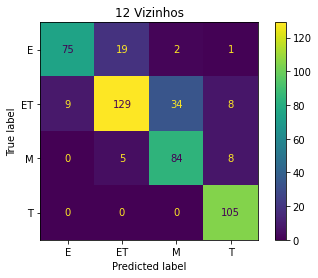

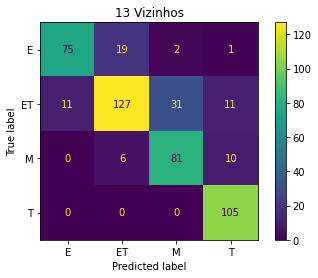

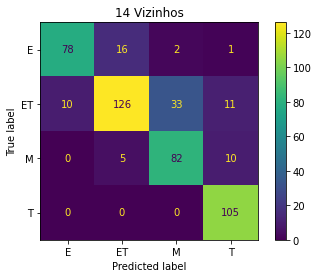

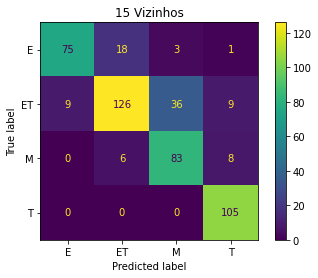

In [ ]:
# Mostrando todas as matrizes de confusão do modelo com melhor acurácia para cada n
for vizinhos in range(1,16):
  cmd = ConfusionMatrixDisplay(dic_dados_matriz_dis_euc[vizinhos], display_labels = list(target.unique())).plot()
  cmd.ax_.set_title(f"{vizinhos} Vizinhos")
  vizinhos = vizinhos + 1 
plt.show()

# 10 - KNN com distância de Chebyshev


Por fim, vamos fazer novamente o treinamento e execução do classificador, porém utilizando distância de Chebyshev. Para isso, vamos executar a pipeline knn criada anteriormente, porém passando como parâmetro o modelo knn com distância Chebyshev.

In [ ]:
# Usando pipeline de KNN que já chama pipeline de treino e avaliação, porém passando o modelo com distancia de Chebyshev
dic_acuracias_dis_cheb, dic_modelo_dis_cheb, dic_dados_treino_dis_cheb, dic_dados_teste_dis_cheb, dic_dados_matriz_dis_cheb = pipeline_knn(features, target, dic_modelos["knn_chebyshev"])

Após execução das duas pipelines (treino e avaliação), vamos analisar os resultados do KNN de distância de Chebyshev. Novamente, vamos analisar as acuracias criando um dataframe com base no dicionário de retorno.

In [ ]:
# Printando dataframe
print(pd.DataFrame(dic_acuracias_dis_cheb))

         1         2         3         4         5         6         7   \
0  0.603340  0.599165  0.634656  0.743215  0.764092  0.764092  0.753653   
1  0.613779  0.665971  0.695198  0.647182  0.613779  0.609603  0.603340   
2  0.588727  0.632568  0.649269  0.678497  0.680585  0.653445  0.638831   
3  0.597077  0.580376  0.620042  0.630480  0.630480  0.620042  0.617954   
4  0.620042  0.674322  0.703549  0.651357  0.638831  0.638831  0.626305   

         8         9         10        11        12        13        14  \
0  0.757829  0.747390  0.747390  0.743215  0.743215  0.745303  0.732777   
1  0.594990  0.601253  0.730689  0.741127  0.745303  0.739040  0.745303   
2  0.622129  0.628392  0.599165  0.592902  0.586639  0.574113  0.569937   
3  0.607516  0.599165  0.594990  0.555324  0.578288  0.582463  0.563674   
4  0.617954  0.609603  0.597077  0.582463  0.567850  0.553236  0.557411   

         15  
0  0.736952  
1  0.722338  
2  0.553236  
3  0.569937  
4  0.536534  


Diferentemente dos dois KNNs utilizados nas sessões anteriores, podemos identificar que o KNN com cálculo de distância de Chebyshev resulta em acurácias diferentes. As acurácias obtidas para o KNN com distância de Chebyshev foram menores para todos os números de vizinhos. Para facilitar a visualização, veja abaixo o gráfico de acurácia por número de vizinhos dos KNN utilizando distância de Chebyshev.

[Text(0, 0.5, 'Acurácia'),
 Text(0.5, 0, 'Número de vizinhos'),
 Text(0.5, 1.0, 'Acurácia x N° de vizinhos para KNN com distância de Chebyshev')]

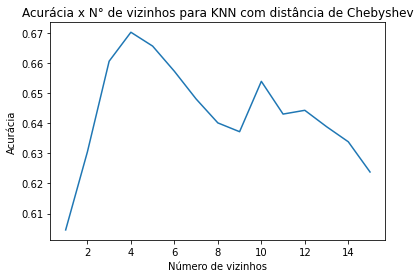

In [ ]:
# Plot das médias de acurácia para o KNN com distância de Chebyshev
p_dis_cheb = sns.lineplot(x=list(dic_acuracias_dis_cheb.keys()), y=[mean(lista) for lista in list(dic_acuracias_dis_cheb.values())])
p_dis_cheb.set(xlabel = "Número de vizinhos", ylabel = "Acurácia", title='Acurácia x N° de vizinhos para KNN com distância de Chebyshev')

Podemos observar que em relação ao número de vizinhos a acurácia média dos modelos começa muito baixa, assim como nos dois modelos analisados nas sessões anteriores. Conforme o número de vizinhos cresce, a acurácia também aumenta consideravelmente, porém, conforme o KNN utilizou mais de 4 vizinhos, a acurácia caiu novamente. Com 10 vizinhos subiu um pouco, porém em seguida continuou caindo.

Vamos ver como as matrizes de confusão se comportaram com as variações do número de vizinhos para este KNN.

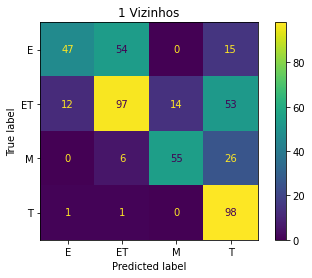

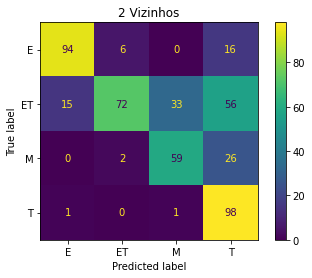

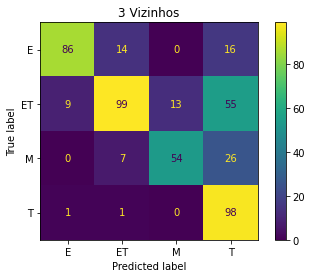

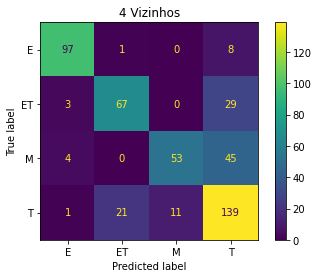

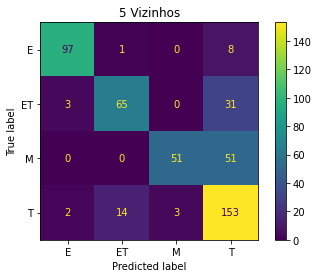

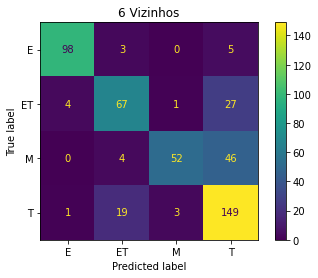

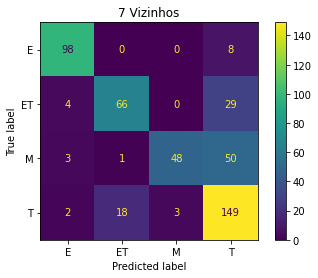

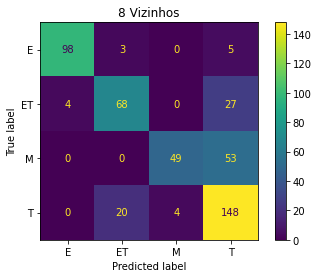

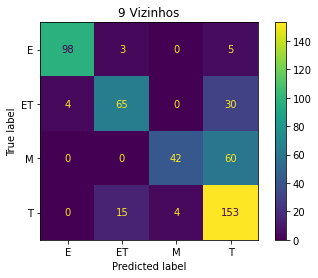

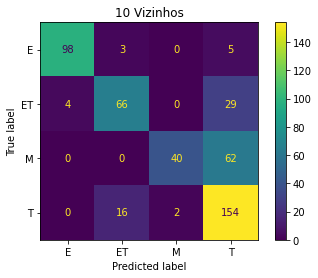

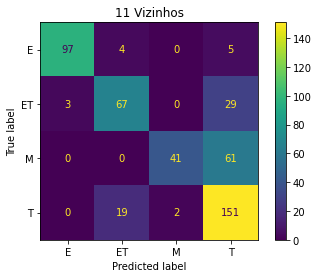

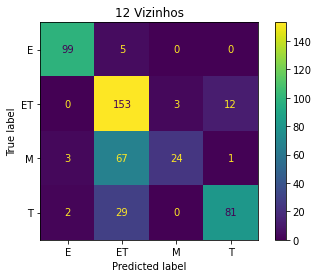

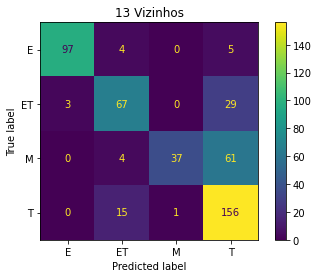

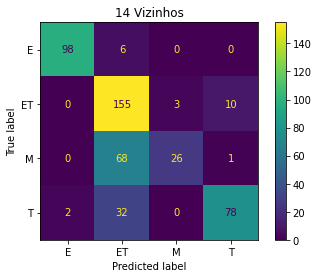

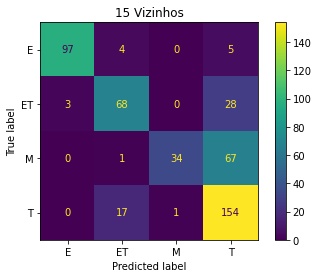

In [ ]:
# Mostrando todas as matrizes de confusão do modelo com melhor acurácia para cada n - KNN de Chebyshev
for vizinhos in range(1,16):
  cmd = ConfusionMatrixDisplay(dic_dados_matriz_dis_cheb[vizinhos], display_labels = list(target.unique())).plot()
  cmd.ax_.set_title(f"{vizinhos} Vizinhos")
plt.show()

# 11 - Pipeline para Árvore de Decisão

No KNN temos um parâmetro numérico que temos interesse de variar. Já na árvore de decisão também temos interesse em variar alguns parâmetros numéricos, três exemplos seriam o número mínimo de amostras por folha, a profundidade máxima da árvore e o número mínimo de amostras para realizar um split em ramos.

Aqui vamos construir um pipeline semelhante ao de KNN, mas que faz uma iteração nesses três parâmetros, o número mínimo de amostras por folha (1 a 30), a profundidade máxima da árvore (1 a 20) e o número mínimo de amostras para o split (2 a 30).

Veja que aqui temos um complicador que não enfrentamos nos testes de KNN, temos que variar mais de um parâmetro ao longo dos treinamentos e testes. Para fazer essa combinação de parâmetros usaremos a ferramenta GridSearchCV do scikit-learn. Esse é um método que realiza uma busca exaustiva com parâmetros passados em busca de otimizar uma métrica também passada como parâmetro. No nosso caso usaremos a acurácia, como nos outros modelos treinados.

In [ ]:
# Função de pipeline para os métodos 
def pipeline_arv(features, target, modelo):
  parametros ={
      'max_depth' : list(range(1,21)),
      'min_samples_split' : list(range(2,31)),
      'min_samples_leaf' : list(range(1,31))
  }
  dic_acuracias = {}
  dic_modelo = {}
  dic_dados_treino = {}
  dic_dados_teste = {}
  dic_dados_matriz = {}
  grid = GridSearchCV(estimator=modelo, param_grid=parametros, scoring='accuracy')
  grid_treinado = pipeline_treino_teste(features, target, grid)
  return grid_treinado

# 12 - Árvore de decisão com critério de Gini

Vamos agora rodar o pipeline de árvore para o modelo que usa o critério de Gini para construir a árvore. 

In [ ]:
# Usando pipeline de árvore que já chama pipeline de treino e avaliação
resultado_grid = pipeline_arv(features, target, dic_modelos["arv_gini"])

O objeto grid devolvido possui os resultados de cada possibilidade de combinação entre hiperparâmetros na forma de um dicionário. Vamos converter esse dicionário em um dataframe e visualizar os resultados.

In [ ]:
# Dataframe com resultados
pd.DataFrame(resultado_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004077,0.000410,0.001740,0.000105,1,1,2,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.457203,0.473904,0.478079,0.475992,0.471816,0.471399,0.007399,16531
1,0.004258,0.001072,0.001668,0.000079,1,1,3,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.457203,0.473904,0.478079,0.475992,0.471816,0.471399,0.007399,16531
2,0.003769,0.000112,0.001651,0.000090,1,1,4,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.457203,0.473904,0.478079,0.475992,0.471816,0.471399,0.007399,16531
3,0.004291,0.000645,0.001989,0.000420,1,1,5,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.457203,0.473904,0.478079,0.475992,0.471816,0.471399,0.007399,16531
4,0.003704,0.000177,0.001668,0.000141,1,1,6,"{'max_depth': 1, 'min_samples_leaf': 1, 'min_s...",0.457203,0.473904,0.478079,0.475992,0.471816,0.471399,0.007399,16531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,0.004998,0.000065,0.001675,0.000066,20,30,26,"{'max_depth': 20, 'min_samples_leaf': 30, 'min...",0.774530,0.784969,0.793319,0.776618,0.797495,0.785386,0.008994,7145
17396,0.004942,0.000079,0.001662,0.000129,20,30,27,"{'max_depth': 20, 'min_samples_leaf': 30, 'min...",0.774530,0.784969,0.793319,0.776618,0.797495,0.785386,0.008994,7145
17397,0.005076,0.000054,0.001695,0.000115,20,30,28,"{'max_depth': 20, 'min_samples_leaf': 30, 'min...",0.774530,0.784969,0.793319,0.776618,0.797495,0.785386,0.008994,7145
17398,0.005258,0.000221,0.001695,0.000060,20,30,29,"{'max_depth': 20, 'min_samples_leaf': 30, 'min...",0.774530,0.784969,0.793319,0.776618,0.797495,0.785386,0.008994,7145


Veja que ao todo temos 18000 linhas (20X30X30), cada linha representa um modelo com uma configuração de hiperparâmetros. Veja que em cada linha temos uma combinação diferente das colunas `param_max_depth`, `param_min_samples_leaf` e 	`param_min_samples_split`, os parâmetros que configuramos em nossa função de pipeline.

Veja que além do resultado da acurácia também temos outros valores referentes ao treino do modelo, como as colunas `split_test_score` que vão de 0 até 4, uma para cada fold (total de 5 folds). Além disso também temos a média da acurácia para esses 5 treinos.

Para ter uma noção melhor de quais foram os melhores modelos vamos ordenar o nosso dataframe pela coluna `rank_test_score` que já traz a posição do modelo da linha em relação a todos quando falamos da métrica usada. Depois vamos mostrar as 20 primeiras combinações com melhor média de acurácia.

In [ ]:
# Ordenando pelo ranking
rank_modelos = pd.DataFrame(resultado_grid.cv_results_).sort_values("rank_test_score")

In [ ]:
# Mostrando 10 melhores 
rank_modelos.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16533,0.006759,0.001437,0.001835,0.000214,20,1,5,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.839248,0.862213,0.860125,0.841336,0.853862,0.851357,0.009466,1
15661,0.005968,0.000053,0.001648,0.000076,19,1,3,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.843424,0.860125,0.855950,0.845511,0.845511,0.850104,0.006654,2
16538,0.005862,0.000155,0.001638,0.000085,20,1,10,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.843424,0.860125,0.868476,0.839248,0.839248,0.850104,0.011986,2
16531,0.006007,0.000142,0.001688,0.000126,20,1,3,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.845511,0.860125,0.855950,0.843424,0.843424,0.849687,0.006987,4
16541,0.006653,0.001582,0.001917,0.000504,20,1,13,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.835073,0.860125,0.866388,0.839248,0.845511,0.849269,0.012058,5
14801,0.005966,0.000316,0.001671,0.000108,18,1,13,"{'max_depth': 18, 'min_samples_leaf': 1, 'min_...",0.837161,0.855950,0.870564,0.841336,0.841336,0.849269,0.012414,5
16539,0.005761,0.000095,0.001648,0.000092,20,1,11,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.839248,0.860125,0.866388,0.839248,0.841336,0.849269,0.011616,5
14795,0.006021,0.000149,0.001697,0.000047,18,1,7,"{'max_depth': 18, 'min_samples_leaf': 1, 'min_...",0.835073,0.858038,0.868476,0.841336,0.843424,0.849269,0.012202,5
15663,0.006310,0.000821,0.001645,0.000081,19,1,5,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.837161,0.858038,0.862213,0.837161,0.849687,0.848852,0.010363,9
16543,0.005953,0.000177,0.001706,0.000139,20,1,15,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.843424,0.858038,0.866388,0.830898,0.843424,0.848434,0.012428,10


Na tabela acima é possível ver que todos 10 modelos com melhor acurácia possuem `min_samples_leaf` = 1 e `max_depth` entre 18 e 20, além disso, não parece existir uma regra muito bem definida para o parâmetro `samples_split`.

O que isso pode nos dizer é que se quiseremos fazer mais explorações para otimização de hiperparâmetros já temos uma boa indicação de qual região alguns bons valores de alguns desses parâmetros estão.

# 13 - Árvore com critério de entropia

Agora, vamos repetir o mesmo experimento da etapa 12, mas agora usaremos a Árvore de Decisão com critério de entropia para decisão das regras da árvore.

In [ ]:
# Usando pipeline de árvore que já chama pipeline de treino e avaliação
resultado_grid = pipeline_arv(features, target, dic_modelos["arv_entrop"])

Vamos visualizar a tabela com os 10 modelos que apresentaram melhor acurácia.

In [ ]:
# Ordenando pelo ranking
rank_modelos = pd.DataFrame(resultado_grid.cv_results_).sort_values("rank_test_score")
# Mostrando 10 melhores 
rank_modelos.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
15663,0.007098,0.000164,0.001948,0.000104,19,1,5,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.837161,0.870564,0.858038,0.841336,0.853862,0.852192,0.011986,1
16533,0.006483,0.000109,0.001704,0.000078,20,1,5,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.835073,0.864301,0.855950,0.841336,0.851775,0.849687,0.010397,2
16532,0.006396,0.000146,0.001696,0.000124,20,1,4,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.837161,0.864301,0.853862,0.839248,0.851775,0.849269,0.010003,3
16531,0.006389,0.000164,0.001671,0.000088,20,1,3,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.832985,0.864301,0.858038,0.841336,0.849687,0.849269,0.011235,3
16539,0.006436,0.000190,0.001671,0.000075,20,1,11,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.841336,0.862213,0.858038,0.837161,0.847599,0.849269,0.009558,3
15661,0.006987,0.000068,0.001961,0.000150,19,1,3,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.841336,0.855950,0.853862,0.845511,0.847599,0.848852,0.005380,6
15669,0.006334,0.000130,0.001771,0.000127,19,1,11,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.839248,0.862213,0.858038,0.839248,0.845511,0.848852,0.009576,6
15662,0.007807,0.001482,0.002053,0.000195,19,1,4,"{'max_depth': 19, 'min_samples_leaf': 1, 'min_...",0.832985,0.866388,0.851775,0.839248,0.853862,0.848852,0.011706,6
16540,0.006392,0.000130,0.001869,0.000192,20,1,12,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.839248,0.860125,0.860125,0.839248,0.845511,0.848852,0.009485,6
16530,0.006421,0.000118,0.001685,0.000080,20,1,2,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_...",0.832985,0.862213,0.855950,0.843424,0.847599,0.848434,0.010107,10


Veja que com o critério de entropia a região de parâmetros onde temos os modelos com melhor acurácia média é praticamente a mesma que a região apontada pelo critério de Gini. Na verdade, o melhor modelo apresentado com o critério de entropia (0,851357) teve desempenho inferior ao melhor modelo com critério de Gini (0,852192).

Mas, o que podemos dizer com esses resultados é que eles estão alinhados com os apresentados pelo critério de Gini.

# Conclusão e Próximos Passos

Visto os resultados obtidos, pode-se concluir que, os considerados melhores classificadores com KNN e Árvore de Decisão apresentaram maior valor de acurácia próximo à 0.85, sendo valores bem próximos uns dos outros. No entanto, alguns pontos devem ser ressaltdos.

Para o KNN, com o uso de distância de Manhattan e distância Euclidiana, os maiores valores de acurácia foram iguais nos dois modelos, atingindo uma média de 0.85 com 5 vizinhos. Para valores de 1 a 5 vizinhos, medida que o número de vizinhos crescia a média da acurácia aumentava proporcionalmente. No entanto, a partir de 6 vizinhos, o valor médio da acurácia passou a cair. 

Já utilizando a métrica de distância de Chebyshev, o valor médio de acurácia foi bem menor do que aqueles usando outras métricas, alcançando um valor máximo de, aproximadamente, 0.67 com 4 vizinhos. O mesmo comportamento foi observado em comparação aos modelos com as duas outras métricas, no qual a medida que aumentava o número de vizinhos, a acurácia média aumentava, mas, ao atingir um determinado número de vizinhos esse mesmo valor de acurácia começou a diminuir quando o número de vizinhos aumentava.

No caso da Árvore de Decisão, que foram variados o número mínimo de amostras por folha, a profundidade máxima da árvore e o número mínimo de amostras para realizar um split, foram obtidos os seguintes resultados. As melhores acurácias possuíam um valor mínimo de amostras por folha igual a 1, uma profundidade máxima de 18 a 20, mas nenhuma conclusão chegou quanto ao número mínimo para realizar o split devido à grande diversidade de valores dessa métrica nos modelos com maior acurácia. Quanto a acurácia, tanto a construção da Árvore de Decisão por critério de Gini quanto por critério de Entropia apresentaram valores de acurácia próximos, por mais que os modelos por critério de Gini apresentaram valores um pouco melhores.

Com base nos resultados analisados, foi visto que após um exploração pelos classificadores com melhor acurácia, considerando Árvores de Decisão e KNN, ambos os classificadores apresentaram valores de acurácia próximos à 0.85. Mas, acima de tudo, é importante observar como a mudança nos valores de hiperparâmetros para ambos os algoritmos de treinamento gerava modelos com uma alta variação de acurácias, por isso a otimização de hiperparâmetros é uma atividade importante de ser feita quando buscamos aplicar um modelo de *machine learning* a algum problema.

Muitas definições de *Machine Learning Engineering* dizem que a principal tarefa dessa área é criar métodos de comparar e testar o maior número de modelos possível de maneira ágil, para que assim o melhor modelo para um determinado problema possa ser encontrado e usado de maneira adequada. Acreditamos que seguimos de maneira correta esse princípio ao buscarmos essa automatização de alguns processos no nosso projeto. E foi justamente a busca pela otimização de hiperparâmetros dos algoritmos que nos estimulou a criar pipelines e outras estruturas de treinamento e avaliação de modelos que trouxessem mais agilidade ao nosso processo já que o projeto baseava-se realmente nessa intensa criação de modelos e teste dos mesmos para comparação.

Como próximos passos podemos definir um aumento no escopo de exploração do problema para otimizar ainda mais os modelos para o problema, poderiamos replicar a nossa metodologia considerando diferentes algoritmos de classificação como SVM ou Naive-Bayes, ou aumentado o range de variação de alguns hiperparâmetros, ou usando métodos de redução dimensão. As possibilidades de continuação do projeto são inúmeras, pois o que sempre se busca é a otimização dos resultados para que tenhamos o modelo com as melhores características possíveis dentro daquilo que é desejado.